## 1.1) Use the training variables to determine the system dynamics

excluding the noise (w, q) term from the formulas

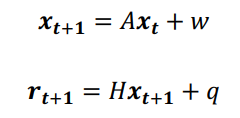

Keep the noise terms related to the following:
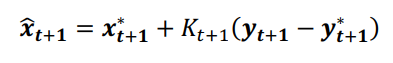

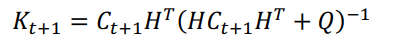

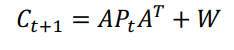

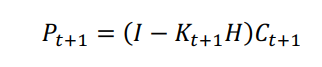

Trainable parameters: $\theta=\{A,H,W,Q\}$

We obtain them with lineawr regression on:
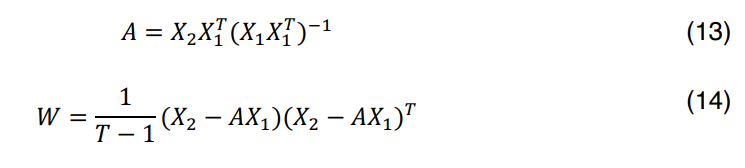
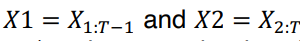
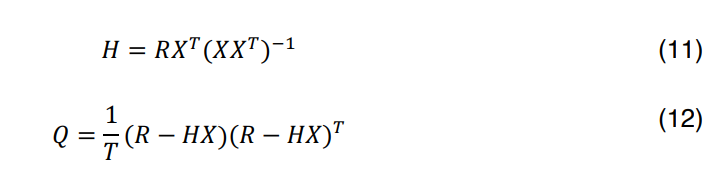


In [53]:
import scipy
import numpy as np
import matplotlib.pyplot as plt

file = scipy.io.loadmat("/home/andrei/Desktop/COURSE_SMNT/ASS_1/KalmanDecoder.mat")

print(file.keys())

dict_keys(['__header__', '__version__', '__globals__', 'P_0', 'R_test', 'R_train', 'X_test', 'X_train', 'x_0'])


In [12]:
# X_train shape: (variable, timepoint)
#   Here, the variables are 1, x_pos, y_pos, x_vel, y_vel

# R_train shape: (variable, timepoint)
#   Here, the variables are the firing rates of 113 neurons from the somatosensory Area 2.

print(file["X_train"].shape)
print(file["R_train"].shape)

# all numpy arrays

X_train = file["X_train"]
X_test = file["X_test"]
R_train = file["R_train"]
R_test = file["R_test"]
x_0  = file["x_0"]
P_0 = file["P_0"]

print(P_0)


(5, 9000)
(113, 9000)
[[1000    0    0    0    0]
 [   0 1000    0    0    0]
 [   0    0 1000    0    0]
 [   0    0    0 1000    0]
 [   0    0    0    0 1000]]


### Optimizing parameters

In [50]:
T = len(R_train[0])

# initializations
x_0  = file["x_0"]
P_0 = file["P_0"]

# A, W, H, Q computed before iterating

X1 = X_train[:, :-1]
X2 = X_train[:, 1:]

A = (X2@(X1.T)) @ np.linalg.inv(X1@(X2.T))
W = (1/(T-1)) * (X2-A@X1)@((X2-A@X1).T)
H = R_train @ X_train.T @ np.linalg.inv(X_train@X_train.T)
Q = (1/T) * (R_train-H@X_train)@((R_train-H@X_train).T)


shape r (113, 1)
shape r_true (113,)
shape P_prev (5, 5)
P_prev = [[ 4.52717531e-03 -3.44225903e-02 -1.96114339e-01  3.90842075e-02
   4.58609317e-02]
 [-3.44226690e-02  3.89166669e+00  3.16777349e+00 -8.73748753e-01
  -1.35301517e+00]
 [-1.96114488e-01  3.16777314e+00  1.12333272e+01 -1.46776213e+00
  -3.85482491e+00]
 [ 3.90844428e-02 -8.73746178e-01 -1.46775831e+00  1.81139192e+01
  -2.65120824e+00]
 [ 4.58598402e-02 -1.35301847e+00 -3.85482634e+00 -2.65123436e+00
   1.34688458e+01]]
P_0 =  [[1000    0    0    0    0]
 [   0 1000    0    0    0]
 [   0    0 1000    0    0]
 [   0    0    0 1000    0]
 [   0    0    0    0 1000]]


### Inference on R_test

In [76]:
T = len(R_test[0])


x_history = []
K_history = []

for t in range(T):

    r_true = R_test[:, t]

    if t == 0:
        C = A @ P_0 @ A.T + W
        K = C @ H.T @ np.linalg.inv( H @ C @ H.T + Q)
        K_history.append(K)
        r = H @ x_0

        x = np.squeeze(x_0) + K @ (r_true - np.squeeze(r))  # removing redundant dimensions for adition and substraction operations
        x_prev = x
        x_history.append(x)

        I = np.identity(n= len(P_0[0]))
        P_prev = (I - K @ H) @ C  # should have the same shape as P_0



    if t != 0:
        
        # same shit, but with x_prev and P_prev instead

        C = A @ P_prev @ A.T + W
        K = C @ H.T @ np.linalg.inv( H @ C @ H.T + Q)
        K_history.append(K)
        r = H @ x_prev

        x = np.squeeze(x_prev) + K @ (r_true - np.squeeze(r))  # removing redundant dimensions for adition and substraction operations
        
        x_prev = x
        x_history.append(x)

        I = np.identity(n = len(P_prev[0]))
        P_prev = (I - K @ H) @ C  # should have the same shape as P_0



aux
(5,)
aux
(5,)
aux
(5,)
aux
(5,)
aux
(5,)
aux
(5,)
aux
(5,)
aux
(5,)
aux
(5,)
aux
(5,)
aux
(5,)
aux
(5,)
aux
(5,)
aux
(5,)
aux
(5,)
aux
(5,)
aux
(5,)
aux
(5,)
aux
(5,)
aux
(5,)
aux
(5,)
aux
(5,)
aux
(5,)
aux
(5,)
aux
(5,)
aux
(5,)
aux
(5,)
aux
(5,)
aux
(5,)
aux
(5,)
aux
(5,)
aux
(5,)
aux
(5,)
aux
(5,)
aux
(5,)
aux
(5,)
aux
(5,)
aux
(5,)
aux
(5,)
aux
(5,)
aux
(5,)
aux
(5,)
aux
(5,)
aux
(5,)
aux
(5,)
aux
(5,)
aux
(5,)
aux
(5,)
aux
(5,)
aux
(5,)
aux
(5,)
aux
(5,)
aux
(5,)
aux
(5,)
aux
(5,)
aux
(5,)
aux
(5,)
aux
(5,)
aux
(5,)
aux
(5,)
aux
(5,)
aux
(5,)
aux
(5,)
aux
(5,)
aux
(5,)
aux
(5,)
aux
(5,)
aux
(5,)
aux
(5,)
aux
(5,)
aux
(5,)
aux
(5,)
aux
(5,)
aux
(5,)
aux
(5,)
aux
(5,)
aux
(5,)
aux
(5,)
aux
(5,)
aux
(5,)
aux
(5,)
aux
(5,)
aux
(5,)
aux
(5,)
aux
(5,)
aux
(5,)
aux
(5,)
aux
(5,)
aux
(5,)
aux
(5,)
aux
(5,)
aux
(5,)
aux
(5,)
aux
(5,)
aux
(5,)
aux
(5,)
aux
(5,)
aux
(5,)
aux
(5,)
aux
(5,)
aux
(5,)
aux
(5,)
aux
(5,)
aux
(5,)
aux
(5,)
aux
(5,)
aux
(5,)
aux
(5,)
aux
(5,)
aux
(5,)
aux
(5,)
a

#### Plotting decoder performance

In [57]:
print(X_test[0])

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.

(1000, 5, 113)


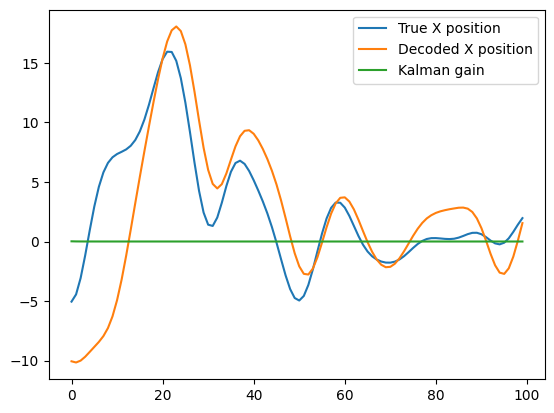

In [95]:
T = 100

K_history = np.array(K_history)
x_history = np.array(x_history)

plt.plot(range(T), X_test[4][:T], label= "True X position")
plt.plot(range(T), x_history[:T, 4], label= "Decoded X position")
print(np.shape(K_history))


# plt.plot(range(T), K_history[:T, 4, 0], label= "Kalman gain")

plt.legend()


## 1.2) Assess goodness of fit for each kinematic variable
by printing its $R^2$



In [97]:
from sklearn.metrics import r2_score

print("R^2 for x pos", r2_score(y_true= X_test[1], y_pred= x_history[:, 1]))
print("R^2 for y pos", r2_score(y_true= X_test[2], y_pred= x_history[:, 2]))
print("R^2 for x vel", r2_score(y_true= X_test[3], y_pred= x_history[:, 3]))
print("R^2 for vel", r2_score(y_true= X_test[4], y_pred= x_history[:, 4]))


R^2 for x pos 0.919959849969135
R^2 for y pos 0.9028128477183911
R^2 for x vel 0.5102824344256883
R^2 for vel 0.4503848366378409


## 1.3) Plot decoder performance over test set

for 100 timepoints, like in slide 18

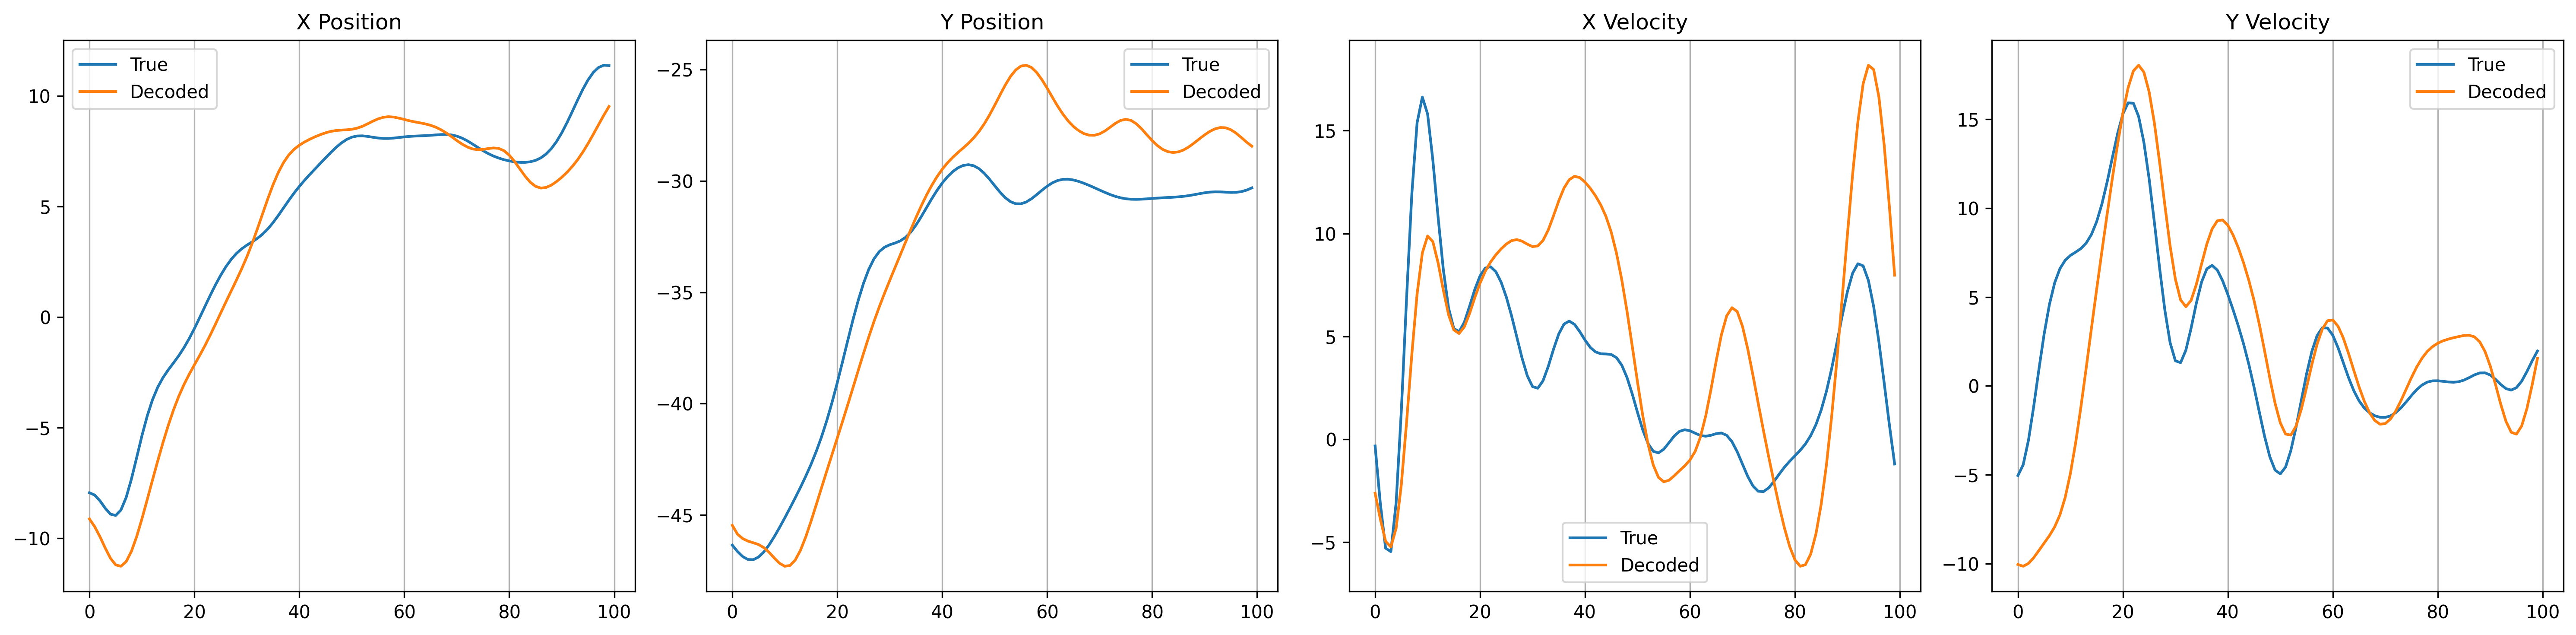

In [105]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming K_history and x_history are already defined

# Assuming T = 100
T = 100

# Assuming X_test is defined

# Assuming X_test, K_history, x_history are numpy arrays

# Create a figure and four subplots
fig, axs = plt.subplots(1, 4, figsize=(20, 5), dpi= 300)

# Plot each subplot

axs[0].plot(range(T), X_test[1][:T], label="True")
axs[0].plot(range(T), x_history[:T, 1], label="Decoded")
axs[0].set_title("X Position")
axs[0].legend()
axs[0].grid(axis="x")


axs[1].plot(range(T), X_test[2][:T], label="True")
axs[1].plot(range(T), x_history[:T, 2], label="Decoded")
axs[1].set_title("Y Position")
axs[1].legend()
axs[1].grid(axis="x")

axs[2].plot(range(T), X_test[3][:T], label="True")
axs[2].plot(range(T), x_history[:T, 3], label="Decoded")
axs[2].set_title("X Velocity")
axs[2].legend()
axs[2].grid(axis="x")

axs[3].plot(range(T), X_test[4][:T], label="True")
axs[3].plot(range(T), x_history[:T, 4], label="Decoded")
axs[3].set_title("Y Velocity")
axs[3].legend()
axs[3].grid(axis="x")
# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


# 2) Plot Mean Kalman gain (across neurons) for each variabel 

In [108]:
K_history = np.array(K_history)

print("shape K_history: ", K_history.shape)

K_mean = np.mean(K_history, axis= 2)

print("shape K_mean", K_mean.shape)



shape K_history:  (1000, 5, 113)
shape K_mean (1000, 5)


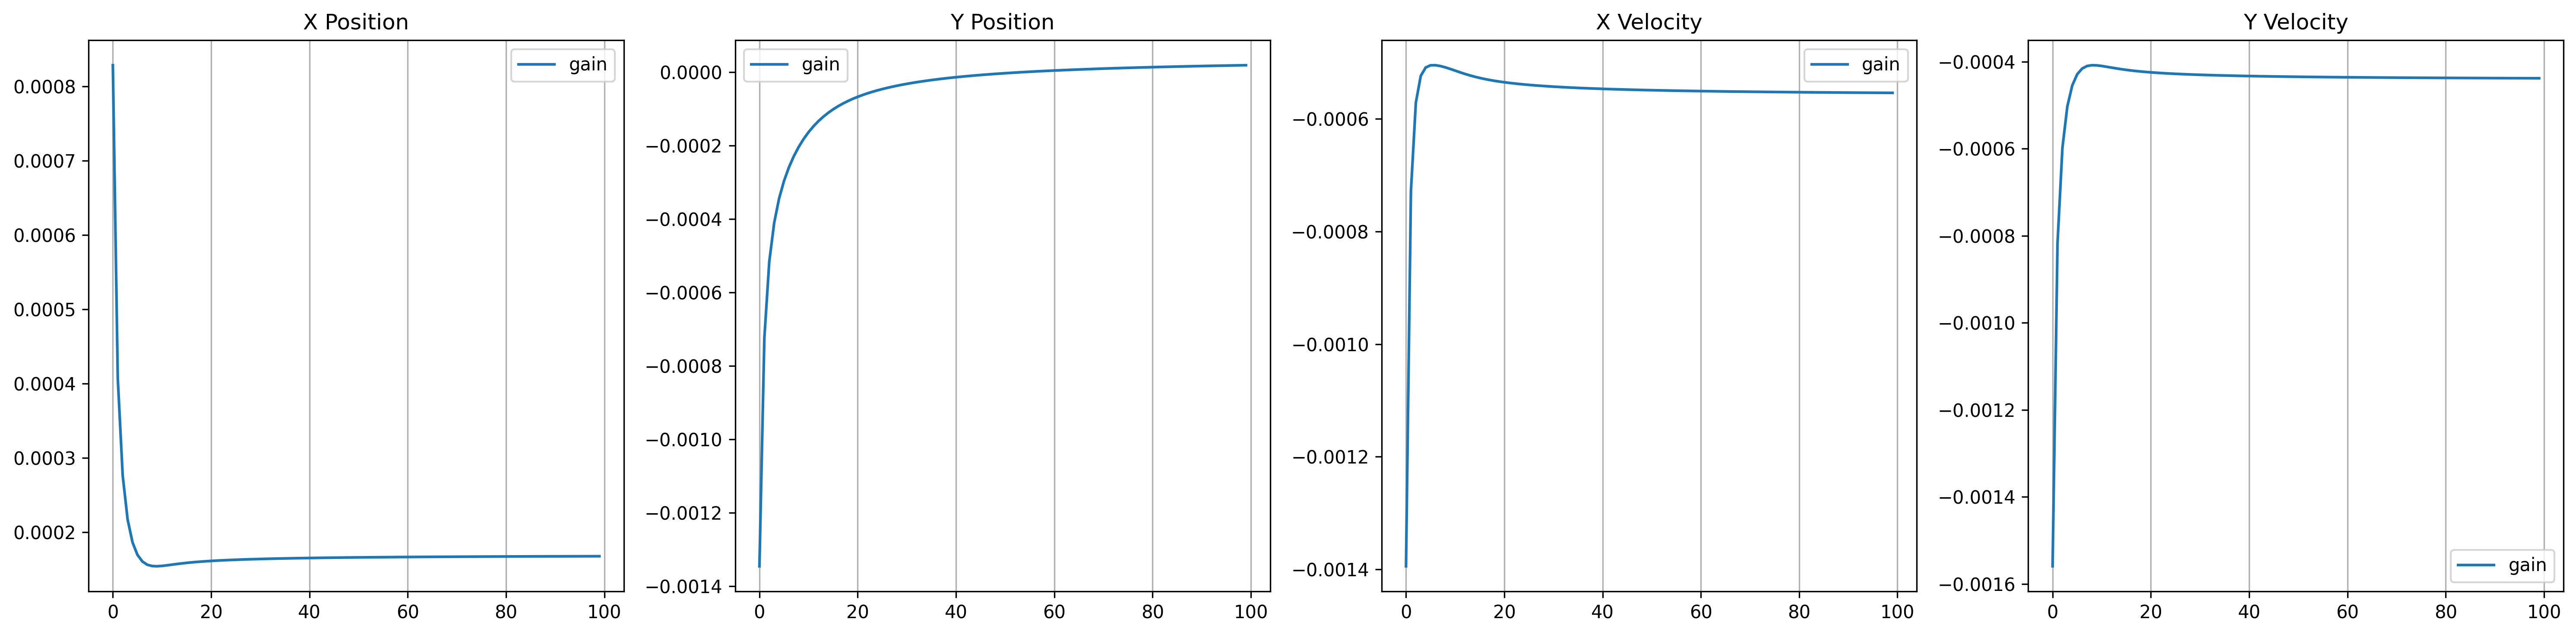

In [109]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming K_history and x_history are already defined

# Assuming T = 100
T = 100

# Assuming X_test is defined

# Assuming X_test, K_history, x_history are numpy arrays

# Create a figure and four subplots
fig, axs = plt.subplots(1, 4, figsize=(20, 5), dpi= 300)

# Plot each subplot

axs[0].plot(range(T), K_mean[:T, 1], label= "gain")
axs[0].set_title("X Position")
axs[0].legend()
axs[0].grid(axis="x")


axs[1].plot(range(T), K_mean[:T, 2], label= "gain")
axs[1].set_title("Y Position")
axs[1].legend()
axs[1].grid(axis="x")

axs[2].plot(range(T), K_mean[:T, 3], label= "gain")
axs[2].set_title("X Velocity")
axs[2].legend()
axs[2].grid(axis="x")

axs[3].plot(range(T), K_mean[:T, 4], label= "gain")
axs[3].set_title("Y Velocity")
axs[3].legend()
axs[3].grid(axis="x")
# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


# 3) Plot sensitivity to initializaitons

In [111]:
print(x_0)

[[1]
 [0]
 [0]
 [0]
 [0]]


In [114]:
T = len(R_test[0])


K_history = []

x_history_2 = []
x_history_3 = []
x_history_4 = []

x_2 = np.array( [[1],
                [-100],
                [-100],
                [-100],
                [-100]])

x_3 = np.array( [[1],
                [0],
                [0],
                [0],
                [0]])

x_4 = np.array( [[1],
                [-100],
                [-100],
                [-100],
                [-100]])

I = np.identity(n= len(P_0[0]))
P_2 = 1000 * I
P_3 = 0.01 * I
P_4 = 0.01 * I


for t in range(T):

    r_true = R_test[:, t]

    if t == 0:
        C = A @ P_0 @ A.T + W
        K = C @ H.T @ np.linalg.inv( H @ C @ H.T + Q)
        K_history.append(K)
        r = H @ x_2

        x = np.squeeze(x_2) + K @ (r_true - np.squeeze(r))  # removing redundant dimensions for adition and substraction operations
        x_prev = x
        x_history_2.append(x)

        I = np.identity(n= len(P_2[0]))
        P_prev = (I - K @ H) @ C  # should have the same shape as P_0



    if t != 0:
        
        # same shit, but with x_prev and P_prev instead

        C = A @ P_prev @ A.T + W
        K = C @ H.T @ np.linalg.inv( H @ C @ H.T + Q)
        K_history.append(K)
        r = H @ x_prev

        x = np.squeeze(x_prev) + K @ (r_true - np.squeeze(r))  # removing redundant dimensions for adition and substraction operations
        
        x_prev = x
        x_history_2.append(x)

        I = np.identity(n = len(P_prev[0]))
        P_prev = (I - K @ H) @ C  # should have the same shape as P_0



In [115]:
for t in range(T):

    r_true = R_test[:, t]

    if t == 0:
        C = A @ P_0 @ A.T + W
        K = C @ H.T @ np.linalg.inv( H @ C @ H.T + Q)
        K_history.append(K)
        r = H @ x_3

        x = np.squeeze(x_3) + K @ (r_true - np.squeeze(r))  # removing redundant dimensions for adition and substraction operations
        x_prev = x
        x_history_3.append(x)

        I = np.identity(n= len(P_3[0]))
        P_prev = (I - K @ H) @ C  # should have the same shape as P_0



    if t != 0:
        
        # same shit, but with x_prev and P_prev instead

        C = A @ P_prev @ A.T + W
        K = C @ H.T @ np.linalg.inv( H @ C @ H.T + Q)
        K_history.append(K)
        r = H @ x_prev

        x = np.squeeze(x_prev) + K @ (r_true - np.squeeze(r))  # removing redundant dimensions for adition and substraction operations
        
        x_prev = x
        x_history_3.append(x)

        I = np.identity(n = len(P_prev[0]))
        P_prev = (I - K @ H) @ C  # should have the same shape as P_0

In [116]:
for t in range(T):

    r_true = R_test[:, t]

    if t == 0:
        C = A @ P_0 @ A.T + W
        K = C @ H.T @ np.linalg.inv( H @ C @ H.T + Q)
        K_history.append(K)
        r = H @ x_4

        x = np.squeeze(x_4) + K @ (r_true - np.squeeze(r))  # removing redundant dimensions for adition and substraction operations
        x_prev = x
        x_history_4.append(x)

        I = np.identity(n= len(P_4[0]))
        P_prev = (I - K @ H) @ C  # should have the same shape as P_0



    if t != 0:
        
        # same shit, but with x_prev and P_prev instead

        C = A @ P_prev @ A.T + W
        K = C @ H.T @ np.linalg.inv( H @ C @ H.T + Q)
        K_history.append(K)
        r = H @ x_prev

        x = np.squeeze(x_prev) + K @ (r_true - np.squeeze(r))  # removing redundant dimensions for adition and substraction operations
        
        x_prev = x
        x_history_4.append(x)

        I = np.identity(n = len(P_prev[0]))
        P_prev = (I - K @ H) @ C  # should have the same shape as P_0

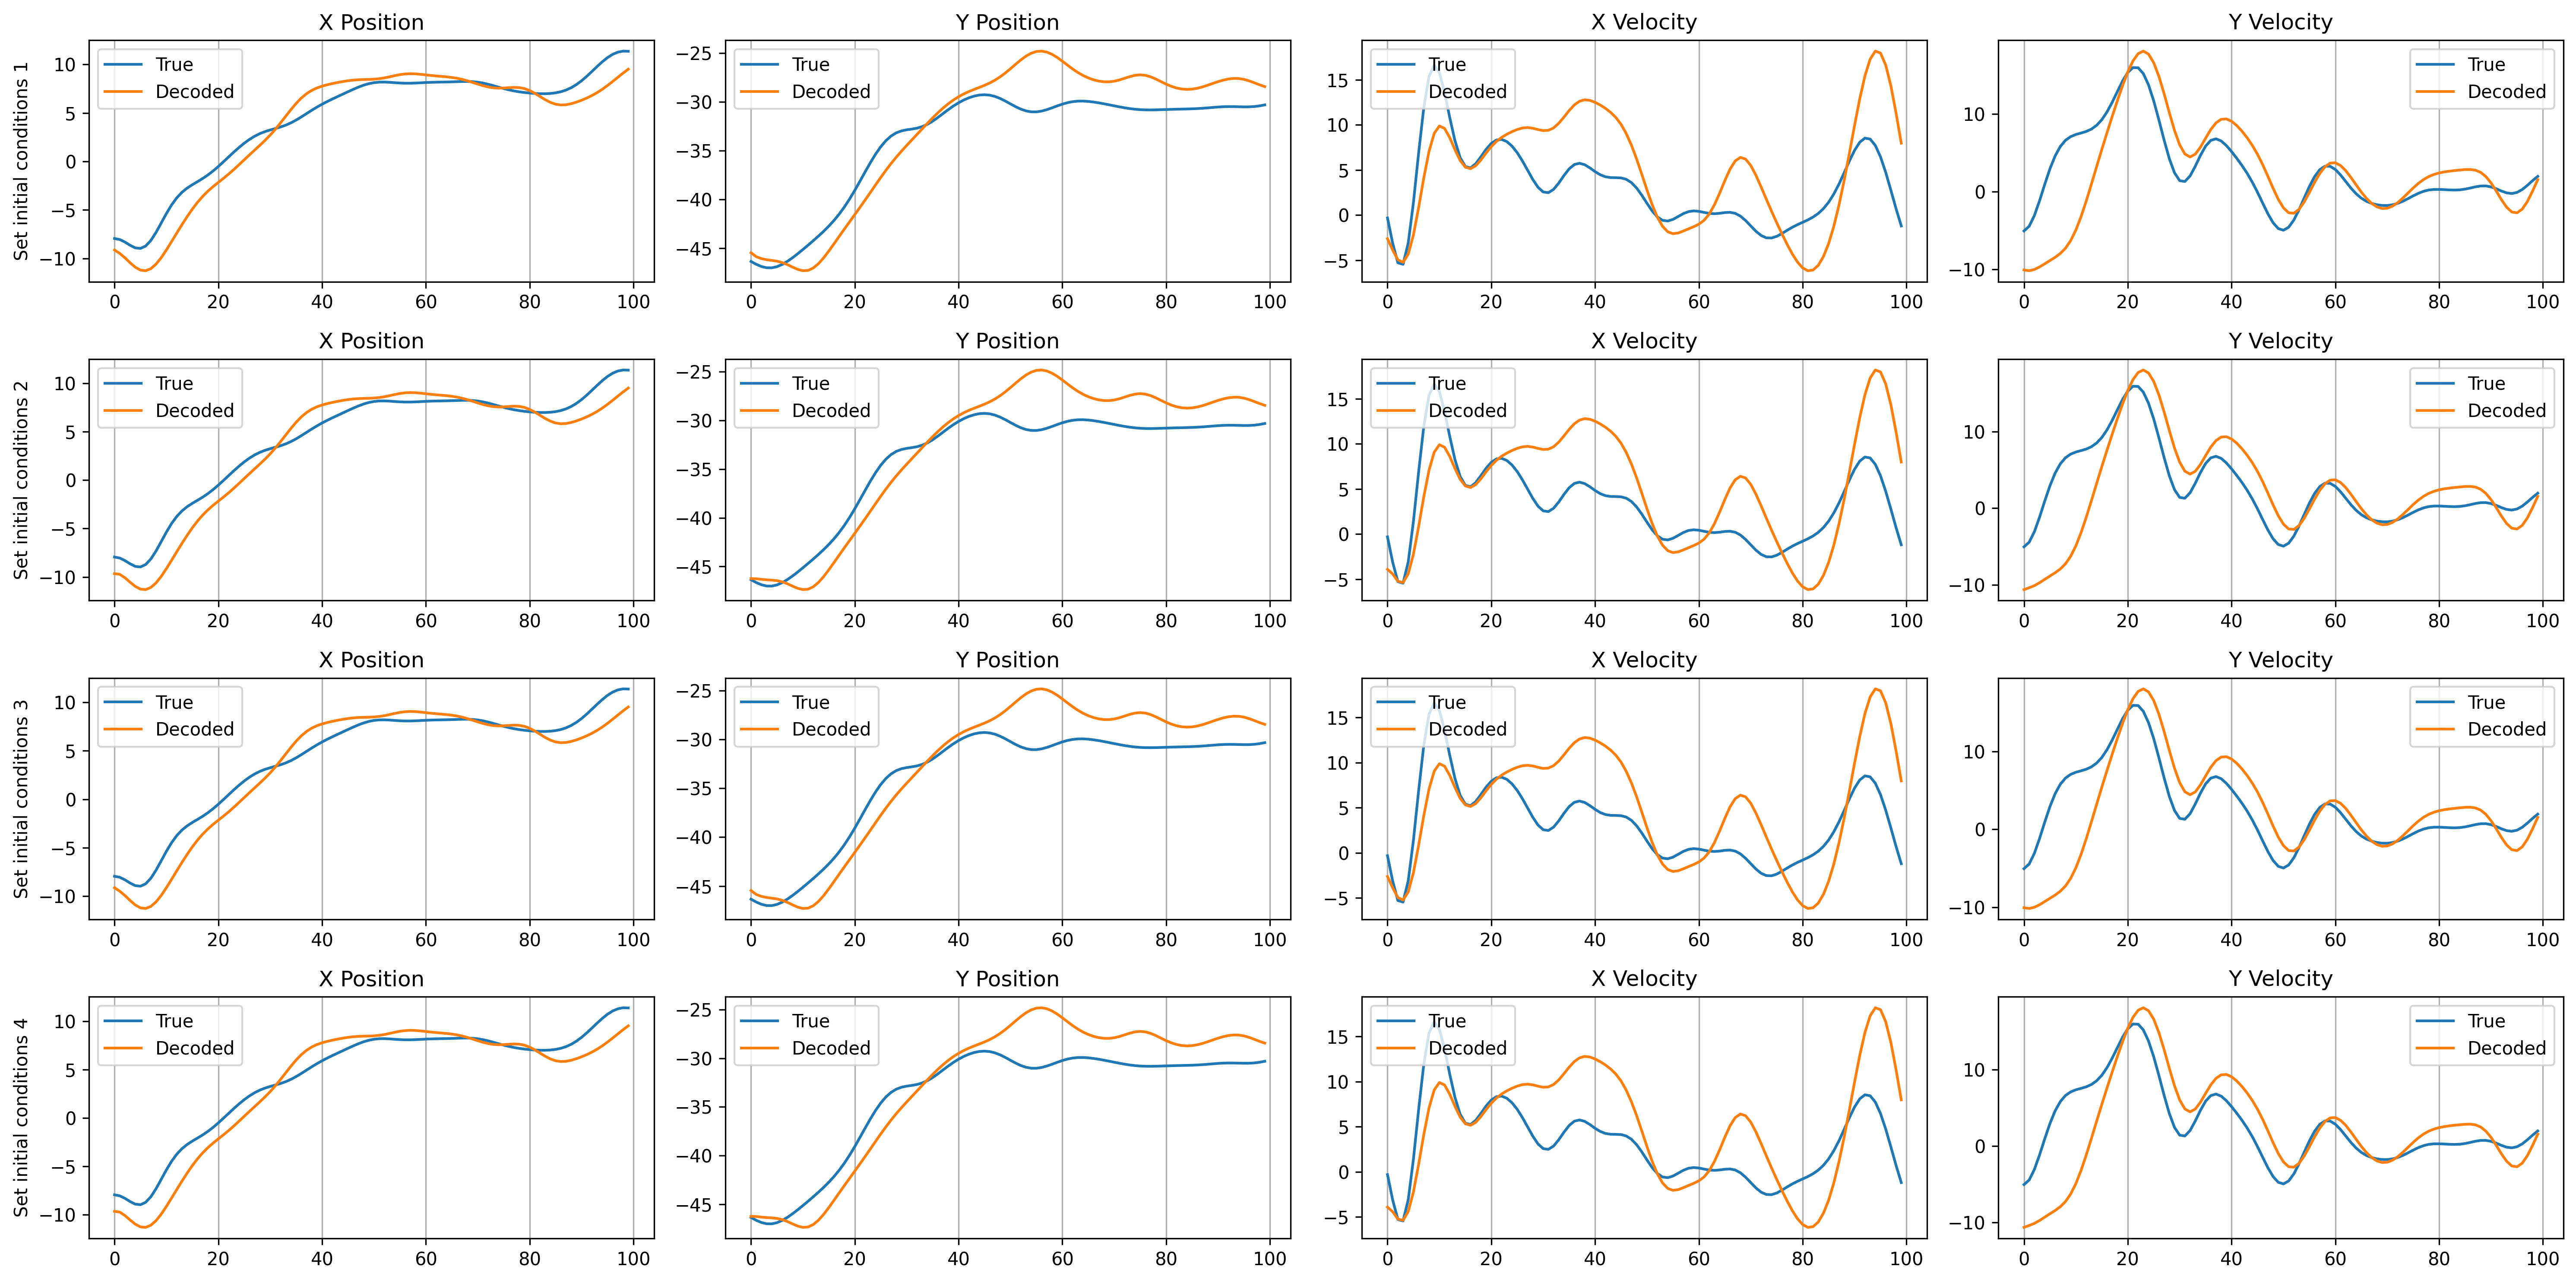

In [124]:
import numpy as np
import matplotlib.pyplot as plt


T = 100

x_history_2 = np.array(x_history_2)
x_history_3 = np.array(x_history_3)
x_history_4 = np.array(x_history_4)

fig, axs = plt.subplots(4, 4, figsize=(20, 10), dpi= 300)

# Plot each subplot

axs[0,0].plot(range(T), X_test[1][:T], label="True")
axs[0,0].plot(range(T), x_history[:T, 1], label="Decoded")
axs[0,0].set_title("X Position")
axs[0,0].legend()
axs[0,0].grid(axis="x")


axs[0,1].plot(range(T), X_test[2][:T], label="True")
axs[0,1].plot(range(T), x_history[:T, 2], label="Decoded")
axs[0,1].set_title("Y Position")
axs[0,1].legend()
axs[0,1].grid(axis="x")

axs[0,2].plot(range(T), X_test[3][:T], label="True")
axs[0,2].plot(range(T), x_history[:T, 3], label="Decoded")
axs[0,2].set_title("X Velocity")
axs[0,2].legend()
axs[0,2].grid(axis="x")

axs[0,3].plot(range(T), X_test[4][:T], label="True")
axs[0,3].plot(range(T), x_history[:T, 4], label="Decoded")
axs[0,3].set_title("Y Velocity")
axs[0,3].legend()
axs[0,3].grid(axis="x")


# -------------------------------------------

axs[1,0].plot(range(T), X_test[1][:T], label="True")
axs[1,0].plot(range(T), x_history_2[:T, 1], label="Decoded")
axs[1,0].set_title("X Position")
axs[1,0].legend()
axs[1,0].grid(axis="x")


axs[1,1].plot(range(T), X_test[2][:T], label="True")
axs[1,1].plot(range(T), x_history_2[:T, 2], label="Decoded")
axs[1,1].set_title("Y Position")
axs[1,1].legend()
axs[1,1].grid(axis="x")

axs[1,2].plot(range(T), X_test[3][:T], label="True")
axs[1,2].plot(range(T), x_history_2[:T, 3], label="Decoded")
axs[1,2].set_title("X Velocity")
axs[1,2].legend()
axs[1,2].grid(axis="x")

axs[1,3].plot(range(T), X_test[4][:T], label="True")
axs[1,3].plot(range(T), x_history_2[:T, 4], label="Decoded")
axs[1,3].set_title("Y Velocity")
axs[1,3].legend()
axs[1,3].grid(axis="x")


# -------------------------------------------
axs[2,0].plot(range(T), X_test[1][:T], label="True")
axs[2,0].plot(range(T), x_history_3[:T, 1], label="Decoded")
axs[2,0].set_title("X Position")
axs[2,0].legend()
axs[2,0].grid(axis="x")


axs[2,1].plot(range(T), X_test[2][:T], label="True")
axs[2,1].plot(range(T), x_history_3[:T, 2], label="Decoded")
axs[2,1].set_title("Y Position")
axs[2,1].legend()
axs[2,1].grid(axis="x")

axs[2,2].plot(range(T), X_test[3][:T], label="True")
axs[2,2].plot(range(T), x_history_3[:T, 3], label="Decoded")
axs[2,2].set_title("X Velocity")
axs[2,2].legend()
axs[2,2].grid(axis="x")

axs[2,3].plot(range(T), X_test[4][:T], label="True")
axs[2,3].plot(range(T), x_history_3[:T, 4], label="Decoded")
axs[2,3].set_title("Y Velocity")
axs[2,3].legend()
axs[2,3].grid(axis="x")


# -------------------------------------------
axs[3,0].plot(range(T), X_test[1][:T], label="True")
axs[3,0].plot(range(T), x_history_4[:T, 1], label="Decoded")
axs[3,0].set_title("X Position")
axs[3,0].legend()
axs[3,0].grid(axis="x")


axs[3,1].plot(range(T), X_test[2][:T], label="True")
axs[3,1].plot(range(T), x_history_4[:T, 2], label="Decoded")
axs[3,1].set_title("Y Position")
axs[3,1].legend()
axs[3,1].grid(axis="x")

axs[3,2].plot(range(T), X_test[3][:T], label="True")
axs[3,2].plot(range(T), x_history_4[:T, 3], label="Decoded")
axs[3,2].set_title("X Velocity")
axs[3,2].legend()
axs[3,2].grid(axis="x")

axs[3,3].plot(range(T), X_test[4][:T], label="True")
axs[3,3].plot(range(T), x_history_4[:T, 4], label="Decoded")
axs[3,3].set_title("Y Velocity")
axs[3,3].legend()
axs[3,3].grid(axis="x")


# -------------------------------------------

for i in range(4):
    axs[i, 0].set_ylabel(f"Set initial conditions {i+1}")


# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()
